In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
import seaborn as sns
from IPython.display import display, Math, Latex
import re

HOME_DIR = os.getcwd()

In [2]:
os.chdir(HOME_DIR)
os.chdir("../experiment_results/rho_stepwise")
files = ['uniform.csv', 
         'unimodal_1.csv', 'unimodal_2.csv', 'unimodal_3.csv', 'unimodal_4.csv', 
         #'bimodal_1.csv', 'bimodal_2.csv', 'bimodal_3.csv', 'bimodal_4.csv', 'bimodal_5.csv', 'bimodal_6.csv',
         'trimodal_1.csv', 'trimodal_2.csv', 'trimodal_3.csv', 'trimodal_4.csv'
        ]

## Grouping by Epsilon

In [3]:
from pprint import pprint

First, we construct a cost matrix that arranges the different percent changes in cost so that 
- cost_matrix[0, 0] (upper left) corresponds to $E(\rho) = 2$ and $\frac{1}{\varepsilon} = 1$
- cost_matrix[m, 0] (bottom left) corresponds to $E(\rho) = 0$ and $\frac{1}{\varepsilon} = 1$
- cost_matrix[0, m] (upper right) corresponds to $E(\rho) = 2$ and $\frac{1}{\varepsilon} = 20$

We use $\frac{1}{\varepsilon}$ so moving towards the right represents an increase in privacy. Moving up represents an increase in the neighborhood given to Endure's robust tuner. 

In [4]:
def prepare_cost_matrix(filename): 
    df = pd.read_csv(filename)
    df['Percent Change'] = (df['Robust Cost'] - df['Nominal Cost'])/df['Nominal Cost']
    # The higher, the more private 
    df['Epsilon Invert'] = df['Epsilon'].apply(lambda x: 1/x)
    df = df.sort_values(by=['Rho', 'Epsilon Invert'])

    # setting x (epsilon_invert) and y (rho) axis for the graph
    epsilon_invert = np.sort(df['Epsilon Invert'].unique())
    rho_values = np.sort(df['Rho'].unique())
    # we invert them because [0, 0] corresponds to upper left corner in imshow
    epsilon_invert = epsilon_invert[::-1]
    rho_values = rho_values[::-1]

    # setup cost matrix 
    cost_matrix = np.zeros((len(rho_values), len(epsilon_invert)))
    for i, rho in enumerate(rho_values):
        for j, eps in enumerate(epsilon_invert): 
            # find the corresponding percent change value, given a specific rho and epsilon invert
            percent_change = df[(df['Rho'] == rho) & (df['Epsilon Invert'] == eps)]['Percent Change'].iloc[0]
            cost_matrix[i, j] = percent_change
    
    return cost_matrix, epsilon_invert, rho_values

In [5]:
def plot_heatmap(cost_matrix, epsilon_invert, rho_values, name='', cost_mins=None, cost_maxs=None): 
    fig, ax = plt.subplots()
    im = ax.imshow(cost_matrix, 
                   extent=[min(epsilon_invert), round(max(epsilon_invert), 1), min(rho_values), max(rho_values)], 
                   vmin=np.min(cost_mins), vmax=np.median(cost_maxs) # to avoid outliers 
                  )
    cbar = fig.colorbar(im)
    ax.set_aspect('auto')
    cbar.set_label('Percent Change')  
    ax.set_title(rf'Epsilon vs. Rho: {name}')
    ax.set_xlabel(r"1 / $\varepsilon$")  
    ax.set_ylabel(r"$\rho$") 
    fig.tight_layout()
    plt.show()

In [6]:
cost_matrix_all = []
cost_maxs = []
cost_mins = []
filenames = []

for file in files: 
    cost_matrix, epsilon_invert, rho_values = prepare_cost_matrix(file)
    filenames += [file]
    cost_mins += [np.min(cost_matrix)]
    cost_maxs += [np.max(cost_matrix)]
    cost_matrix_all += [cost_matrix]

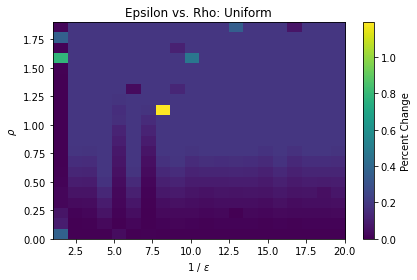

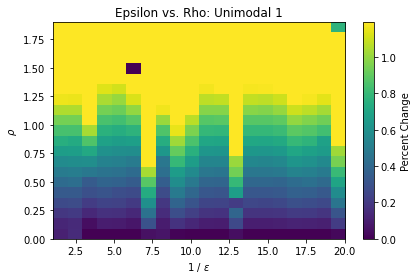

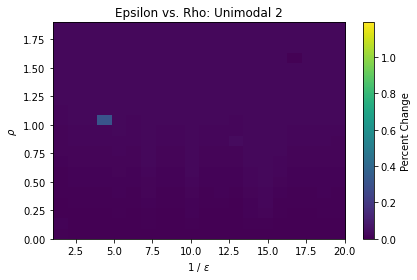

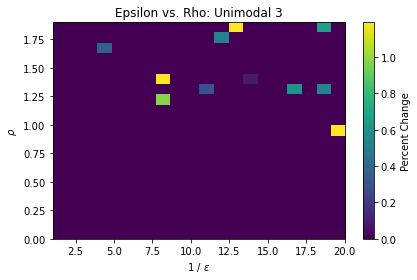

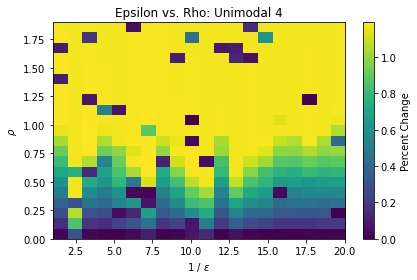

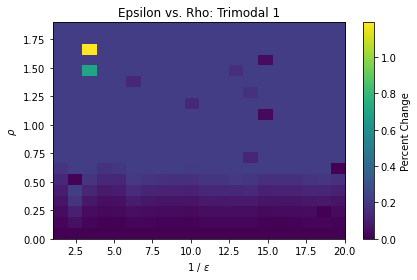

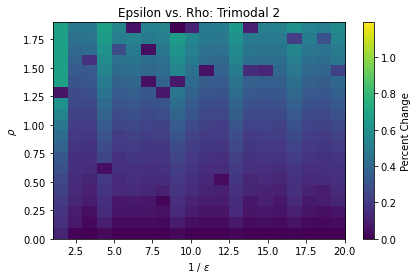

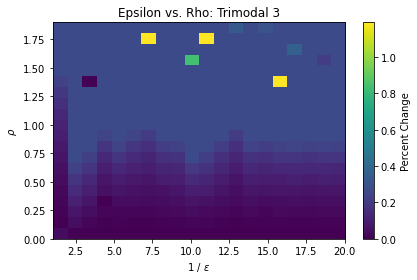

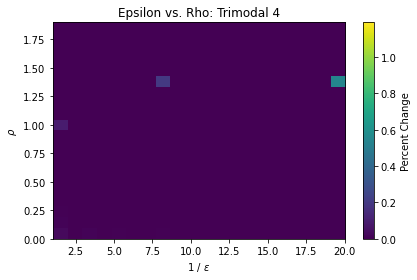

In [8]:
for i in range(len(filenames)): 
    cost_matrix = cost_matrix_all[i]
    name = filenames[i].split('.')[0]
    name = name.replace('_', ' ')
    name = name.capitalize()
    plot_heatmap(cost_matrix, epsilon_invert, rho_values, name=name, cost_mins=cost_mins, cost_maxs=cost_maxs)